<img src="GRIP.jpg">

# Task 3 - To Explore Unsupervised Machine Learning

In this task, we will predict the optimum number of clusters from the ‘Iris’ dataset and represent it visually.

We will use K-Means Clustering algorithm to predict the optimal number of clusters and then later, we will fit this method to our dataset and visulise the clusters on a grapgh.

## 1. Importing all the libraries required for this task

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Downloading the Iris Dataset and exploring it

In [2]:
# Download the iris dataset
url = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
iris = pd.read_csv(path)

# Explore the dataset
iris.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Understanding the dataset:**

We have different Sepal's and Petal's length and width details of different species of flowering plants from the Iris genus and these columns will be our dependet variables.

In [3]:
# Correlation

corr_df = iris.corr()
corr_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


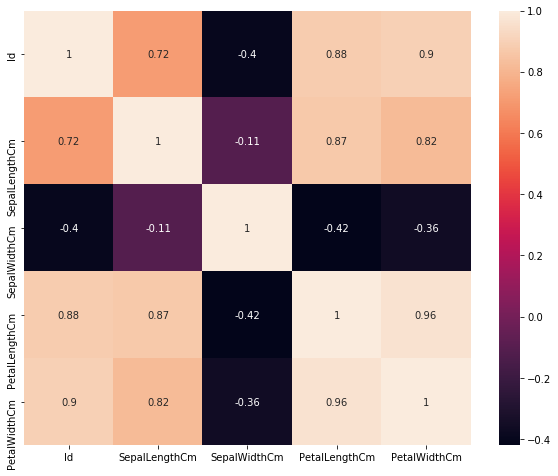

In [4]:
# Heat Map

plt.rcParams['figure.figsize'] = [10, 8]
sns.heatmap(iris.corr(),annot= True )

In [5]:
# Count of flowers in each unique species
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

So we have 50 flowers in each, from 3 unique species.

**Now lets create an array containing our dependent variables**

In [6]:
# Dependent variables array
X = iris.iloc[:, 0:4].values

## 3. Finding the optimal number of clusters by K-Means Clustering algorithm

Here we will use the Elbow Method to find the optimal number of clusters.

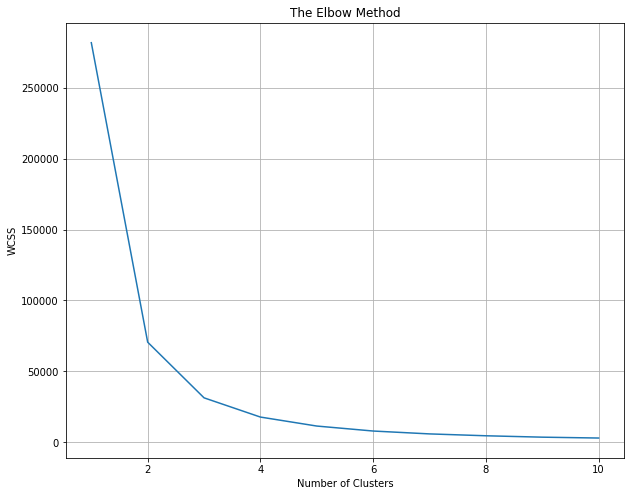

In [7]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    
    # We will use "k-means++" initialization method to avoid falling into the random initialization trap.
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.grid()
plt.show()

The number of optimum clusters is where the elbow occurs in the graph. This is when WCSS doesn't decrease significantly with every iteration.

**In the above graph, we can see that after 3, graph has become almost linear. So, will choose the optimal number of clusters as 3**.

## 4. Training the K-Means model on the dataset

In [8]:
# Fitting K-Means on the dataset

# We will use "k-means++" initialization method to avoid falling into the random initialization trap.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

## 5. Visulaising the clusters

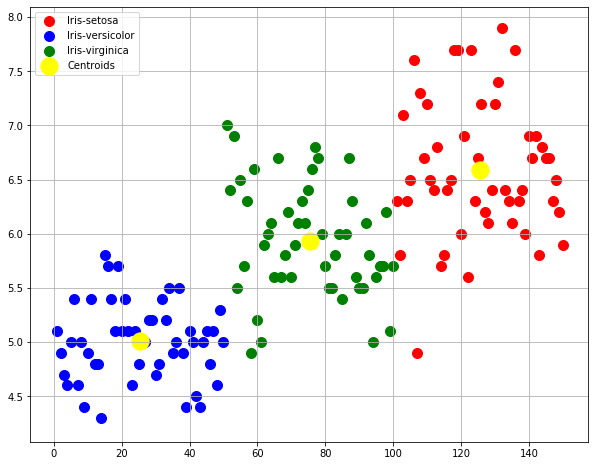

In [9]:
# Visualising the clusters on the first 2 columns with centroids

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.legend()
plt.grid()
plt.show()